In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
import requests

url = "https://api.massive.com/v2/aggs/ticker/AAPL/range/1/day/2025-11-22/2026-02-22?adjusted=true&sort=asc&limit=1200&apiKey=NMiClZvMyqpg9AC1EqcCJ5qYOBbCE5ma"    # Daha önce bulduğunuz URL
api_data = requests.get(url).json()

In [34]:
apple_df = pd.DataFrame(api_data["results"])

In [35]:
apple_df.head(5)

,v,vw,o,c,h,l,t,n
0,65585796.0,275.3140,270.90,275.92,277.00,270.90,1763960400000,755844
1,46914220.0,277.9967,275.27,276.97,280.38,275.25,1764046800000,667295
2,33431423.0,278.0466,276.96,277.55,279.53,276.63,1764133200000,538937
3,20135620.0,277.6285,277.26,278.85,279.00,275.99,1764306000000,369623
4,46587722.0,281.0702,278.01,283.10,283.42,276.14,1764565200000,644276


In [36]:
# convert the time from unix time to date time
apple_df["t"] = pd.to_datetime(apple_df["t"], origin="unix", unit="ms")
apple_df.rename(columns={"v" : "trading_volume",
                         "vw" : "volume_weighted_avg_price",
                         "o" : "open",
                         "c" : "close",
                         "h" : "high",
                         "l" : "low",
                         "t" : "date",
                         "n" : "no_transactions"}, inplace=True)
apple_df.head()

,trading_volume,volume_weighted_avg_price,open,close,high,low,date,no_transactions
0,65585796.0,275.3140,270.90,275.92,277.00,270.90,2025-11-24 05:00:00,755844
1,46914220.0,277.9967,275.27,276.97,280.38,275.25,2025-11-25 05:00:00,667295
2,33431423.0,278.0466,276.96,277.55,279.53,276.63,2025-11-26 05:00:00,538937
3,20135620.0,277.6285,277.26,278.85,279.00,275.99,2025-11-28 05:00:00,369623
4,46587722.0,281.0702,278.01,283.10,283.42,276.14,2025-12-01 05:00:00,644276


In [37]:
apple_df.set_index("date", inplace=True)
apple_df.head()

,trading_volume,volume_weighted_avg_price,open,close,high,low,no_transactions
date,,,,,,,
2025-11-24 05:00:00,65585796.0,275.3140,270.90,275.92,277.00,270.90,755844
2025-11-25 05:00:00,46914220.0,277.9967,275.27,276.97,280.38,275.25,667295
2025-11-26 05:00:00,33431423.0,278.0466,276.96,277.55,279.53,276.63,538937
2025-11-28 05:00:00,20135620.0,277.6285,277.26,278.85,279.00,275.99,369623
2025-12-01 05:00:00,46587722.0,281.0702,278.01,283.10,283.42,276.14,644276


<Axes: xlabel='date'>

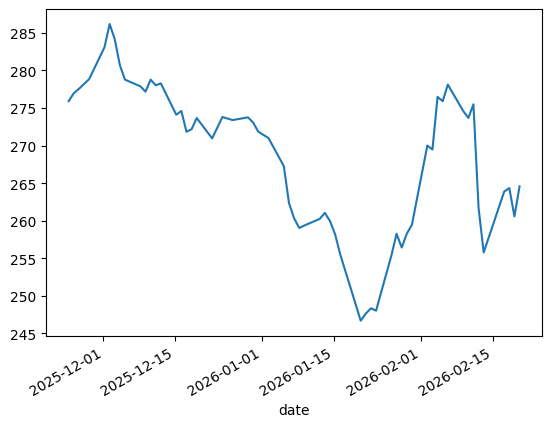

In [38]:
apple_df["close"].plot()

<Axes: xlabel='date'>

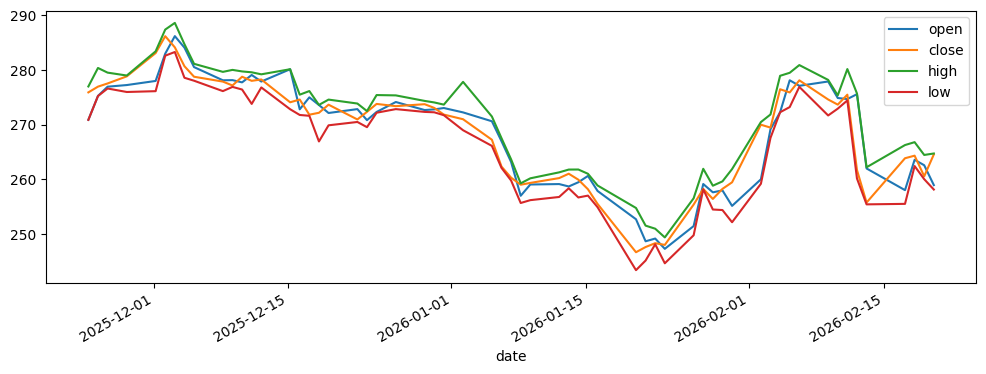

In [43]:
apple_df[["open", "close", "high", "low"]].plot(figsize=(12,4))

In [44]:
from nbresult import ChallengeResult

result = ChallengeResult('apple',
    index_name=apple_df.index.name,
    index_type=apple_df.index.dtype,
    columns=apple_df.columns
)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /Users/buseozgur/.pyenv/versions/3.12.9/envs/workintech/bin/python
cachedir: .pytest_cache
rootdir: /Users/buseozgur/code/buseozgur/data-stock-market/tests
plugins: anyio-4.8.0, typeguard-4.4.2
collecting ... collected 3 items

test_apple.py::TestApple::test_apple_df_columns PASSED                   [ 33%]
test_apple.py::TestApple::test_apple_df_index_is_timestamp PASSED        [ 66%]
test_apple.py::TestApple::test_apple_df_index_name_is_date PASSED        [100%]

============================== 3 passed in 0.55s ===============================


💯 You can commit your code:

git add tests/apple.pickle

git commit -m 'Completed apple step'

git push origin master

